In [ ]:
import numpy as np
import pandas as pd
#from pandas import read_csv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from keras.layers import Dropout
# from tensorflow.python.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
# from sklearn.metrics import cross_entropy
import matplotlib.pyplot as plt

In [ ]:
# Load and Preprocess Data
data = pd.read_csv('/content/Updated_List.csv', header=None)
data

,0,1,2,3,4,5,6,7,8
0,7.5,4.6,3.1,2.212121,2.054545,1.663636,2.260586,2.160668,1.639225
1,7.5,4.6,3.1,2.212121,2.054545,1.663636,2.471220,2.177877,1.543440
2,7.5,4.6,3.1,2.212121,2.054545,1.663636,2.148735,2.048493,1.909046
3,7.5,4.6,3.1,2.212121,2.054545,1.663636,2.417868,2.227188,1.710995
4,7.5,4.6,3.1,2.212121,2.054545,1.663636,2.246036,2.231220,1.516712
...,...,...,...,...,...,...,...,...,...
4995,8.0,6.0,3.0,2.525253,3.737374,1.989899,2.130309,4.090720,2.100784
4996,8.0,6.0,3.0,2.525253,3.737374,1.989899,2.571669,4.048508,1.797962
4997,8.0,6.0,3.0,2.525253,3.737374,1.989899,2.553296,3.361803,1.885446
4998,8.0,6.0,3.0,2.525253,3.737374,1.989899,2.850498,3.864035,2.080539


In [ ]:
# Normalize the whole dataset
# Separate room dimensions from speaker and mic coordinates
room_dimensions = data.iloc[:, :3]
speaker_coordinates = data.iloc[:, 3:6]
mic_coordinates = data.iloc[:, 6:]

In [ ]:
X_max = room_dimensions.iloc[:, 0].max()
X_max

12.4

In [ ]:
# X_min = room_dimensions.iloc[:, 0].min()
# X_min

In [ ]:
Y_max = room_dimensions.iloc[:, 1].max()
Y_max

8.6

In [ ]:
# Y_min = room_dimensions.iloc[:, 1].min()
# Y_min

In [ ]:
Z_max = room_dimensions.iloc[:, 2].max()
Z_max

4.4

In [ ]:
# Z_min = room_dimensions.iloc[:, 2].min()
# Z_min

In [ ]:
# Normalizing the room dimensions X-coordinates
max=1
min=0
room_X = room_dimensions.iloc[:, 0]/ X_max
room_scaled_X = room_X * (max - min) + min

In [ ]:
# Normalizing the room dimensions Y-coordinates
max=1
min=0
room_Y = room_dimensions.iloc[:, 1] / Y_max
room_scaled_Y = room_Y * (max - min) + min

In [ ]:
# Normalizing the room dimensions Z-coordinates
max=1
min=0
room_Z = room_dimensions.iloc[:, 2] / Z_max
room_scaled_Z = room_Z * (max - min) + min

In [ ]:
# Normalizing the speaker dimensions X-coordinates
max=1
min=0
speaker_X = speaker_coordinates.iloc[:, 0] / X_max
speaker_scaled_X = speaker_X * (max - min) + min

In [ ]:
# Normalizing the speaker dimensions Y-coordinates
max=1
min=0
speaker_Y = speaker_coordinates.iloc[:, 1] / Y_max
speaker_scaled_Y = speaker_Y * (max - min) + min

In [ ]:
# Normalizing the speaker dimensions Z-coordinates
max=1
min=0
speaker_Z = speaker_coordinates.iloc[:, 2] / Z_max
speaker_scaled_Z = speaker_Z * (max - min) + min

In [ ]:
# Normalizing the mic dimensions X-coordinates
max=1
min=0
mic_X = mic_coordinates.iloc[:, 0] / X_max
mic_scaled_X = mic_X * (max - min) + min

In [ ]:
# Normalizing the mic dimensions Y-coordinates
max=1
min=0
mic_Y = mic_coordinates.iloc[:, 1] / Y_max
mic_scaled_Y = mic_Y * (max - min) + min

In [ ]:
# Normalizing the mic dimensions Z-coordinates
max=1
min=0
mic_Z = mic_coordinates.iloc[:, 2] / Z_max
mic_scaled_Z = mic_Z * (max - min) + min

In [ ]:
# Combine the scaled room dimensions, speaker coordinates, and mic coordinates
normalized_data = pd.concat([room_scaled_X, room_scaled_Y, room_scaled_Z, speaker_scaled_X, speaker_scaled_Y, speaker_scaled_Z, mic_scaled_X, mic_scaled_Y, mic_scaled_Z], axis=1)  #dataframe concatenation

In [ ]:
normalized_data

,0,1,2,3,4,5,6,7,8
0,0.604839,0.534884,0.704545,0.178397,0.238901,0.378099,0.182305,0.251240,0.372551
1,0.604839,0.534884,0.704545,0.178397,0.238901,0.378099,0.199292,0.253242,0.350782
2,0.604839,0.534884,0.704545,0.178397,0.238901,0.378099,0.173285,0.238197,0.433874
3,0.604839,0.534884,0.704545,0.178397,0.238901,0.378099,0.194989,0.258975,0.388862
4,0.604839,0.534884,0.704545,0.178397,0.238901,0.378099,0.181132,0.259444,0.344707
...,...,...,...,...,...,...,...,...,...
4995,0.645161,0.697674,0.681818,0.203649,0.434578,0.452250,0.171799,0.475665,0.477451
4996,0.645161,0.697674,0.681818,0.203649,0.434578,0.452250,0.207393,0.470757,0.408628
4997,0.645161,0.697674,0.681818,0.203649,0.434578,0.452250,0.205911,0.390907,0.428510
4998,0.645161,0.697674,0.681818,0.203649,0.434578,0.452250,0.229879,0.449306,0.472850


In [ ]:
total_rows = len(data)
train_rows = int(0.6 * total_rows)
test_rows = total_rows - train_rows

print(train_rows)
print(test_rows)

3000
2000


In [ ]:
# Split the DataFrame into training and testing sets
train_data = normalized_data.iloc[:train_rows, :]
test_data = normalized_data.iloc[train_rows:, :]

In [ ]:
test_data

,0,1,2,3,4,5,6,7,8
3000,1.000000,1.000000,1.000000,0.243402,0.680996,0.494949,0.211574,0.727621,0.409878
3001,1.000000,1.000000,1.000000,0.243402,0.680996,0.494949,0.219558,0.905838,0.488351
3002,1.000000,1.000000,1.000000,0.243402,0.680996,0.494949,0.255547,0.685754,0.467448
3003,1.000000,1.000000,1.000000,0.243402,0.680996,0.494949,0.248456,0.681926,0.527758
3004,1.000000,1.000000,1.000000,0.243402,0.680996,0.494949,0.258407,0.657572,0.461557
...,...,...,...,...,...,...,...,...,...
4995,0.645161,0.697674,0.681818,0.203649,0.434578,0.452250,0.171799,0.475665,0.477451
4996,0.645161,0.697674,0.681818,0.203649,0.434578,0.452250,0.207393,0.470757,0.408628
4997,0.645161,0.697674,0.681818,0.203649,0.434578,0.452250,0.205911,0.390907,0.428510
4998,0.645161,0.697674,0.681818,0.203649,0.434578,0.452250,0.229879,0.449306,0.472850


In [ ]:
# Shuffle the train dataset
train_data_shuffled = train_data.sample(frac=1, random_state=42).reset_index(drop=True)  # frac=1 shuffles the entire dataset, random_state for reproducibility
train_data_shuffled

,0,1,2,3,4,5,6,7,8
0,0.435484,0.627907,0.681818,0.260508,0.359173,0.452250,0.268511,0.341098,0.390055
1,0.620968,0.488372,0.750000,0.372271,0.233263,0.401515,0.390607,0.179134,0.456338
2,0.435484,0.627907,0.681818,0.198925,0.321353,0.424702,0.198925,0.321353,0.543388
3,0.451613,0.465116,0.704545,0.173021,0.232558,0.316116,0.194841,0.163667,0.275190
4,0.419355,0.488372,0.727273,0.217009,0.241250,0.371901,0.216347,0.245813,0.351080
...,...,...,...,...,...,...,...,...,...
2995,0.741935,0.802326,0.863636,0.203649,0.481207,0.423783,0.220242,0.501282,0.434547
2996,0.620968,0.488372,0.750000,0.224585,0.253700,0.383838,0.192734,0.294787,0.409040
2997,0.620968,0.488372,0.750000,0.218557,0.237961,0.454545,0.219706,0.235290,0.357863
2998,0.927419,0.860465,0.954545,0.723363,0.564012,0.494490,0.714482,0.633506,0.763446


In [ ]:
# Shuffle the test dataset
test_data_shuffled = test_data.sample(frac=1, random_state=42).reset_index(drop=True)  # frac=1 shuffles the entire dataset, random_state for reproducibility
test_data_shuffled

,0,1,2,3,4,5,6,7,8
0,0.645161,0.697674,0.681818,0.412186,0.312427,0.369605,0.399477,0.338238,0.396795
1,0.830645,0.744186,0.795455,0.582111,0.260747,0.345500,0.589116,0.262036,0.327120
2,0.419355,0.383721,0.659091,0.253177,0.208715,0.343434,0.245147,0.198219,0.399022
3,0.604839,0.604651,0.750000,0.389378,0.350951,0.377410,0.388715,0.355515,0.356590
4,0.419355,0.383721,0.659091,0.194526,0.213648,0.386364,0.207453,0.176992,0.503157
...,...,...,...,...,...,...,...,...,...
1995,0.556452,0.546512,0.727273,0.380987,0.293399,0.375574,0.350568,0.261122,0.429050
1996,0.419355,0.383721,0.659091,0.213099,0.156096,0.209596,0.243818,0.167263,0.205609
1997,0.604839,0.604651,0.750000,0.375122,0.334038,0.374197,0.348422,0.368581,0.232150
1998,0.419355,0.383721,0.659091,0.254154,0.153629,0.277778,0.264372,0.145433,0.177449


In [ ]:
# Separate the features (X) and target labels (y) for both training and testing sets
X_train = train_data_shuffled.iloc[:,:-3]   #features
y_train = train_data_shuffled.iloc[:, -3:]   #features
# convert all values into float as expected by neural networks model
X_train, y_train = X_train.astype('float'), y_train.astype('float')

X_test = test_data_shuffled.iloc[:,:-3]    #labels
y_test = test_data_shuffled.iloc[:, -3:]   #labels
# convert all values into float as expected by neural networks model
X_test, y_test = X_test.astype('float'), y_test.astype('float')

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3000, 6)
y_train shape: (3000, 3)
X_test shape: (2000, 6)
y_test shape: (2000, 3)


In [ ]:
from  keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Training the neural network model

# Model Construction - layer by layer
# define the keras model
#no of layers = depth; no. of neurons = length
model = Sequential()

model.add(Dense(20, input_shape=(6, ), activation='relu', kernel_initializer='he_normal'))   #dense-fully connected
model.add(Dropout(0.1))
model.add(Dense(15, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.4))
# model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='relu'))  # Output layer with 3 nodes for mic coordinates

In [ ]:
# Compile model

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                140       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 6)                 6

In [ ]:
# fit the keras model on the dataset
model1 = model.fit(X_train, y_train, epochs=130, batch_size=32, verbose=2)

Epoch 1/130
94/94 - 2s - loss: 0.0898 - 2s/epoch - 16ms/step
Epoch 2/130
94/94 - 0s - loss: 0.0403 - 243ms/epoch - 3ms/step
Epoch 3/130
94/94 - 0s - loss: 0.0182 - 213ms/epoch - 2ms/step
Epoch 4/130
94/94 - 0s - loss: 0.0143 - 209ms/epoch - 2ms/step
Epoch 5/130
94/94 - 0s - loss: 0.0128 - 212ms/epoch - 2ms/step
Epoch 6/130
94/94 - 0s - loss: 0.0118 - 220ms/epoch - 2ms/step
Epoch 7/130
94/94 - 0s - loss: 0.0111 - 216ms/epoch - 2ms/step
Epoch 8/130
94/94 - 0s - loss: 0.0106 - 207ms/epoch - 2ms/step
Epoch 9/130
94/94 - 0s - loss: 0.0105 - 198ms/epoch - 2ms/step
Epoch 10/130
94/94 - 0s - loss: 0.0105 - 214ms/epoch - 2ms/step
Epoch 11/130
94/94 - 0s - loss: 0.0103 - 238ms/epoch - 3ms/step
Epoch 12/130
94/94 - 0s - loss: 0.0102 - 230ms/epoch - 2ms/step
Epoch 13/130
94/94 - 0s - loss: 0.0100 - 237ms/epoch - 3ms/step
Epoch 14/130
94/94 - 0s - loss: 0.0100 - 229ms/epoch - 2ms/step
Epoch 15/130
94/94 - 0s - loss: 0.0097 - 246ms/epoch - 3ms/step
Epoch 16/130
94/94 - 0s - loss: 0.0098 - 204ms/epoc

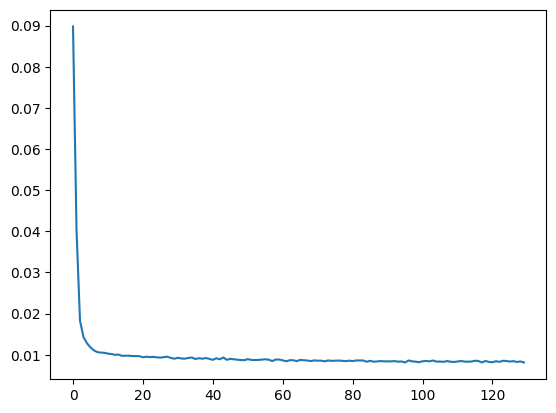

In [ ]:
plt.plot(model1.history['loss'])

In [ ]:
y_test

,6,7,8
0,0.399477,0.338238,0.396795
1,0.589116,0.262036,0.327120
2,0.245147,0.198219,0.399022
3,0.388715,0.355515,0.356590
4,0.207453,0.176992,0.503157
...,...,...,...
1995,0.350568,0.261122,0.429050
1996,0.243818,0.167263,0.205609
1997,0.348422,0.368581,0.232150
1998,0.264372,0.145433,0.177449


In [ ]:
type(y_test)

pandas.core.frame.DataFrame

In [ ]:
X_test = X_test.drop_duplicates()

In [ ]:
X_test

,0,1,2,3,4,5
0,0.645161,0.697674,0.681818,0.412186,0.312427,0.369605
1,0.830645,0.744186,0.795455,0.582111,0.260747,0.345500
2,0.419355,0.383721,0.659091,0.253177,0.208715,0.343434
3,0.604839,0.604651,0.750000,0.389378,0.350951,0.377410
4,0.419355,0.383721,0.659091,0.194526,0.213648,0.386364
...,...,...,...,...,...,...
1201,0.604839,0.604651,0.750000,0.443548,0.266385,0.337236
1227,0.604839,0.604651,0.750000,0.161290,0.325581,0.345271
1294,0.645161,0.697674,0.681818,0.330727,0.368804,0.383379
1319,0.709677,0.616279,0.704545,0.216031,0.235612,0.258264


In [ ]:
# Evaluate on test set

y_pred = model.predict(X_test)

print(y_pred.shape)
print(type(y_pred))
print(type(y_test))
y_test = y_test.to_numpy()
print(type(y_test))


13/13 [==============================] - 0s 1ms/step
(400, 3)
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [ ]:
# Calculate the number of rows in y_pred and y_test
num_y_pred_rows = 400
num_y_test_rows = 2000


#Creating an empty list to store the values with closest coordinates
closest_vals = []
min_distances = []

# Loop through each row in y_pred
for i in range(num_y_pred_rows):
  print("\n Back to I loop")


  euc_dist_min = np.full([1 , 1], np.inf)
  # Loop through each group of 5 rows in y_test
  for j in range(i * 5, (i + 1) * 5):

    print("\nJ for loop starts")
    # euc_dist_min = float('inf')
    print("j = ", j)

    print("euc_dist_min = ", euc_dist_min)
    print("euc_dist_min[0,0] = ", euc_dist_min[0,0])
    # euc_dist_min = np.reshape(euc_dist_min, (-1,1))

    print("euc_dist_min shape = ", euc_dist_min.shape)

    # Calculate the Euclidean distance between y_pred[i] and the 5 rows in y_test

    euc_dist = (((y_test[j,0]-y_pred[i,0])**2)+((y_test[j,1]-y_pred[i,1])**2)+((y_test[j,2]-y_pred[i,2])**2)**(0.5))
    print(euc_dist)
    print("euc_dist=", euc_dist.shape)
    euc_dist = np.reshape(euc_dist, (-1,1))
    print("euc_dist after reshaping = ", euc_dist.shape)
    print(type(euc_dist))

    print("euc_dist type= ", type(euc_dist))
    print("euc_dist_min type= ", type(euc_dist_min))

    if (euc_dist[0,0]<euc_dist_min[0,0]):
      print("This is getting executed")
      euc_dist_min[0,0] = euc_dist[0,0]
      euc_dist_min[0,0] = euc_dist[0,0]
      print("euc_dist_min = ", euc_dist_min)
      index = j
      print("index = ", index)

    # Get the index of the closest row in y_test for this group
    # closest_index = np.argmin(euc_dist)

  min_distances.append(euc_dist_min[0,0])

  # Add the euclidean distance of the closest row to the sum
  print("y_test[index] = ", y_test[index])
  print("y_test[index] type = ", type(y_test[index]))


  closest_vals.append(y_test[index])


# Convert the list to a NumPy ndarray
min_distances_array = np.array(min_distances)
print("min_distances_array = ", min_distances_array)


print(closest_vals)
print(len(closest_vals))

# Convert the list to a NumPy ndarray
closest_vals_array = np.array(closest_vals)
print("closest_vals_array = ", closest_vals_array)
print("closest_vals_array shape", closest_vals_array.shape)


Streaming output truncated to the last 5000 lines.
euc_dist_min type=  <class 'numpy.ndarray'>
y_test[index] =  [0.24799177 0.4442738  0.35864961]
y_test[index] type =  <class 'numpy.ndarray'>

 Back to I loop

J for loop starts
j =  1655
euc_dist_min =  [[inf]]
euc_dist_min[0,0] =  inf
euc_dist_min shape =  (1, 1)
0.07885533745773626
euc_dist= ()
euc_dist after reshaping =  (1, 1)
<class 'numpy.ndarray'>
euc_dist type=  <class 'numpy.ndarray'>
euc_dist_min type=  <class 'numpy.ndarray'>
This is getting executed
euc_dist_min =  [[0.07885534]]
index =  1655

J for loop starts
j =  1656
euc_dist_min =  [[0.07885534]]
euc_dist_min[0,0] =  0.07885533745773626
euc_dist_min shape =  (1, 1)
0.0736010688682388
euc_dist= ()
euc_dist after reshaping =  (1, 1)
<class 'numpy.ndarray'>
euc_dist type=  <class 'numpy.ndarray'>
euc_dist_min type=  <class 'numpy.ndarray'>
This is getting executed
euc_dist_min =  [[0.07360107]]
index =  1656

J for loop starts
j =  1657
euc_dist_min =  [[0.07360107]]
eu

In [ ]:
error = mean_squared_error(closest_vals_array, y_pred)
print(closest_vals_array.shape)
print(y_pred.shape)
print('MSE: %.3f' % error)
print(y_pred)
print("\n")

(400, 3)
(400, 3)
MSE: 0.005
[[0.34234032 0.3210212  0.3768671 ]
 [0.41124624 0.33555305 0.3908655 ]
 [0.25943807 0.28557402 0.3558829 ]
 ...
 [0.32449204 0.3254438  0.3751228 ]
 [0.25943807 0.28557402 0.3558829 ]
 [0.3919217  0.34053168 0.38902625]]




In [ ]:
# Model Evaluation
test_loss = model.evaluate(X_test, closest_vals_array)
print("Test Loss:", test_loss)

13/13 [==============================] - 0s 2ms/step - loss: 0.0048
Test Loss: 0.004785528872162104


In [ ]:
y_pred_denorm_X = (y_pred[:, 0] * X_max)

In [ ]:
y_pred_denorm_X = np.reshape(y_pred_denorm_X, (-1,1))
y_pred_denorm_X.shape

(400, 1)

In [ ]:
y_pred_denorm_Y = (y_pred[:, 1] * Y_max)

In [ ]:
y_pred_denorm_Y = np.reshape(y_pred_denorm_Y, (-1,1))

In [ ]:
y_pred_denorm_Z = (y_pred[:, 2] * Z_max)

In [ ]:
y_pred_denorm_Z = np.reshape(y_pred_denorm_Z, (-1,1))

In [ ]:
# Combine the y_pred_denorm's X,Y and Z coordinates
y_pred_denorm = np.hstack((y_pred_denorm_X, y_pred_denorm_Y, y_pred_denorm_Z))  #array concatenation

In [ ]:
y_pred_denorm

array([[4.24502  , 2.7607825, 1.6582152],
       [5.0994534, 2.8857563, 1.7198082],
       [3.217032 , 2.4559367, 1.5658848],
       ...,
       [4.023701 , 2.798817 , 1.6505404],
       [3.217032 , 2.4559367, 1.5658848],
       [4.859829 , 2.9285727, 1.7117156]], dtype=float32)

In [ ]:
y_pred_denorm.shape

(400, 3)

In [ ]:
closest_vals_array_denorm_X = (closest_vals_array[:, 0] * X_max)

In [ ]:
closest_vals_array_denorm_X = np.reshape(closest_vals_array_denorm_X, (-1,1))

In [ ]:
closest_vals_array_denorm_Y = (closest_vals_array[:, 1] * Y_max)

In [ ]:
closest_vals_array_denorm_Y = np.reshape(closest_vals_array_denorm_Y, (-1,1))

In [ ]:
closest_vals_array_denorm_Z = (closest_vals_array[:, 2] * Z_max)

In [ ]:
closest_vals_array_denorm_Z = np.reshape(closest_vals_array_denorm_Z, (-1,1))

In [ ]:
# Combine the closest_vals_array_denorm's X,Y and Z coordinates
closest_vals_array_denorm = np.hstack((closest_vals_array_denorm_X, closest_vals_array_denorm_Y, closest_vals_array_denorm_Z))  #array concatenation

In [ ]:
print(closest_vals_array_denorm)

[[4.95351817 2.90885    1.7458993 ]
 [4.09041212 4.40818014 1.68889465]
 [2.86871409 3.66397449 1.70295055]
 ...
 [4.76204665 3.38884571 1.63522618]
 [2.68404739 2.42077519 1.57024294]
 [4.34703719 2.2456478  1.8878196 ]]


In [ ]:
closest_vals_array_denorm.shape

(400, 3)

In [ ]:
# # Calculate the loss for each coordinate separately
# x_loss = ((closest_vals_array_denorm[:, 0] - y_pred_denorm[:, 0])**2)
# y_loss = ((closest_vals_array_denorm[:, 1] - y_pred_denorm[:, 1])**2)
# z_loss = ((closest_vals_array_denorm[:, 2] - y_pred_denorm[:, 2])**2)

# print(x_loss)

# # print("\n difference in values: ", y_test[:, 0] - y_pred[:, 0])
# print("\n")

# print(x_loss)
# print(x_loss.shape)


# # Check if values in the ndarray are infinite for x_loss
# is_inf = np.isinf(x_loss)

# # Remove infinite values from the ndarray using boolean indexing
# x_loss_new = x_loss[~is_inf]

# print("\nArray with Infinite Values:")
# print(x_loss[is_inf])

# print("\nCleaned ndarray (without Infinite Values):")
# print(x_loss_new)
# print(x_loss_new.shape)

# # np.delete(a, 0))

# # Check if values in the ndarray are infinite for y_loss
# is_inf = np.isinf(y_loss)

# # Remove infinite values from the ndarray using boolean indexing
# y_loss_new = y_loss[~is_inf]


# # Check if values in the ndarray are infinite for z_loss
# is_inf = np.isinf(z_loss)

# # Remove infinite values from the ndarray using boolean indexing
# z_loss_new = z_loss[~is_inf]


In [ ]:
# # Calculate the sum of all values in each loss array
# x_loss_sum = np.sum(x_loss_new)
# y_loss_sum = np.sum(y_loss_new)
# z_loss_sum = np.sum(z_loss_new)

# x_loss_sum = (x_loss_sum**(1/2))
# y_loss_sum = (y_loss_sum**(1/2))
# z_loss_sum = (z_loss_sum**(1/2))

# # Print the sum of losses for each coordinate
# print("Sum of X Losses:", x_loss_sum)
# print("Sum of Y Losses:", y_loss_sum)
# print("Sum of Z Losses:", z_loss_sum)

In [ ]:
np.mean(min_distances_array)

0.03727977453029934

In [ ]:
np.std(min_distances_array)

0.02521752841197387

In [ ]:
np.var(min_distances_array)

0.0006359237392087095

In [ ]:
min_distances_array.shape

(400,)

In [ ]:
type(X_test)

pandas.core.frame.DataFrame

In [ ]:
X_test

,0,1,2,3,4,5
0,0.645161,0.697674,0.681818,0.412186,0.312427,0.369605
1,0.830645,0.744186,0.795455,0.582111,0.260747,0.345500
2,0.419355,0.383721,0.659091,0.253177,0.208715,0.343434
3,0.604839,0.604651,0.750000,0.389378,0.350951,0.377410
4,0.419355,0.383721,0.659091,0.194526,0.213648,0.386364
...,...,...,...,...,...,...
1201,0.604839,0.604651,0.750000,0.443548,0.266385,0.337236
1227,0.604839,0.604651,0.750000,0.161290,0.325581,0.345271
1294,0.645161,0.697674,0.681818,0.330727,0.368804,0.383379
1319,0.709677,0.616279,0.704545,0.216031,0.235612,0.258264


In [ ]:
room_X_test = (X_test.iloc[:, 0] * X_max)

In [ ]:
type(room_X_test)

pandas.core.series.Series

In [ ]:
room_X_test.shape

(400,)

In [ ]:
room_X_test = room_X_test.values.reshape(-1, 1)

In [ ]:
room_X_test.shape

(400, 1)

In [ ]:
room_Y_test = (X_test.iloc[:, 1] * Y_max)

In [ ]:
room_Y_test = room_Y_test.values.reshape(-1, 1)

In [ ]:
room_Z_test = (X_test.iloc[:, 2] * Z_max)

In [ ]:
room_Z_test = room_Z_test.values.reshape(-1, 1)

In [ ]:
room_Z_test.shape

(400, 1)

In [ ]:
type(room_Z_test)

numpy.ndarray

In [ ]:
speaker_X_test = (X_test.iloc[:, 3] * X_max)
speaker_X_test = speaker_X_test.values.reshape(-1, 1)

In [ ]:
speaker_Y_test = (X_test.iloc[:, 4] * Y_max)
speaker_Y_test = speaker_Y_test.values.reshape(-1, 1)

In [ ]:
speaker_Z_test = (X_test.iloc[:, 5] * Z_max)
speaker_Z_test = speaker_Z_test.values.reshape(-1, 1)

In [ ]:
# Merge the three room and speaker column arrays horizontally
room_speaker_denorm = np.concatenate((room_X_test, room_Y_test, room_Z_test, speaker_X_test, speaker_Y_test, speaker_Z_test), axis=1)

In [ ]:
room_speaker_denorm.shape

(400, 6)

In [ ]:
# convert array to dataframe
room_speaker_denorm_df = pd.DataFrame(room_speaker_denorm)

In [ ]:
room_speaker_denorm_df

,0,1,2,3,4,5
0,8.0,6.0,3.0,5.111111,2.686869,1.626263
1,10.3,6.4,3.5,7.218182,2.242424,1.520202
2,5.2,3.3,2.9,3.139394,1.794949,1.511111
3,7.5,5.2,3.3,4.828283,3.018182,1.660606
4,5.2,3.3,2.9,2.412121,1.837374,1.700000
...,...,...,...,...,...,...
395,7.5,5.2,3.3,5.500000,2.290909,1.483838
396,7.5,5.2,3.3,2.000000,2.800000,1.519192
397,8.0,6.0,3.0,4.101010,3.171717,1.686869
398,8.8,5.3,3.1,2.678788,2.026263,1.136364


In [ ]:
# concatenate y_pred and closest_vals_array (both denormalized)
y_test_pred = np.concatenate((closest_vals_array_denorm, y_pred_denorm), axis=1)

In [ ]:
y_test_pred

array([[4.95351817, 2.90885   , 1.7458993 , 4.24501991, 2.76078248,
        1.65821517],
       [4.09041212, 4.40818014, 1.68889465, 5.09945345, 2.88575625,
        1.71980822],
       [2.86871409, 3.66397449, 1.70295055, 3.21703196, 2.45593667,
        1.56588483],
       ...,
       [4.76204665, 3.38884571, 1.63522618, 4.02370119, 2.79881692,
        1.65054035],
       [2.68404739, 2.42077519, 1.57024294, 3.21703196, 2.45593667,
        1.56588483],
       [4.34703719, 2.2456478 , 1.8878196 , 4.85982895, 2.92857265,
        1.71171558]])

In [ ]:
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df

,0,1,2,3,4,5
0,4.953518,2.908850,1.745899,4.245020,2.760782,1.658215
1,4.090412,4.408180,1.688895,5.099453,2.885756,1.719808
2,2.868714,3.663974,1.702951,3.217032,2.455937,1.565885
3,4.610531,3.151472,1.549368,4.022144,2.696714,1.638437
4,3.427015,2.316509,1.675179,3.217032,2.455937,1.565885
...,...,...,...,...,...,...
395,3.482668,2.759191,1.669117,4.287801,2.631851,1.645359
396,2.453038,1.593029,1.213137,3.217032,2.455937,1.565885
397,4.762047,3.388846,1.635226,4.023701,2.798817,1.650540
398,2.684047,2.420775,1.570243,3.217032,2.455937,1.565885


In [ ]:
# Merge the three DataFrames horizontally
merged_df = pd.concat([room_speaker_denorm_df, y_test_pred_df], axis=1)

In [ ]:
merged_df.shape

(400, 12)

In [ ]:
merged_df

,0,1,2,3,4,5,0,1,2,3,4,5
0,8.0,6.0,3.0,5.111111,2.686869,1.626263,4.953518,2.908850,1.745899,4.245020,2.760782,1.658215
1,10.3,6.4,3.5,7.218182,2.242424,1.520202,4.090412,4.408180,1.688895,5.099453,2.885756,1.719808
2,5.2,3.3,2.9,3.139394,1.794949,1.511111,2.868714,3.663974,1.702951,3.217032,2.455937,1.565885
3,7.5,5.2,3.3,4.828283,3.018182,1.660606,4.610531,3.151472,1.549368,4.022144,2.696714,1.638437
4,5.2,3.3,2.9,2.412121,1.837374,1.700000,3.427015,2.316509,1.675179,3.217032,2.455937,1.565885
...,...,...,...,...,...,...,...,...,...,...,...,...
395,7.5,5.2,3.3,5.500000,2.290909,1.483838,3.482668,2.759191,1.669117,4.287801,2.631851,1.645359
396,7.5,5.2,3.3,2.000000,2.800000,1.519192,2.453038,1.593029,1.213137,3.217032,2.455937,1.565885
397,8.0,6.0,3.0,4.101010,3.171717,1.686869,4.762047,3.388846,1.635226,4.023701,2.798817,1.650540
398,8.8,5.3,3.1,2.678788,2.026263,1.136364,2.684047,2.420775,1.570243,3.217032,2.455937,1.565885


In [ ]:
# Save the DataFrame to a CSV file with a tab ('\t') as the delimiter
merged_df.to_csv('Final60_40_dec.csv', index=False)

In [ ]:
# Read STOI values from the CSV file
fig = pd.read_csv('/content/Averaged_Test_and_Predicted_STOI_6040.csv', header=None)
# y_test_stoi = fig.iloc[:, 0].values
# y_pred_stoi = fig.iloc[:, 1].values
y_test_stoi = fig.iloc[25:50, 0].values
y_pred_stoi = fig.iloc[25:50, 1].values

In [ ]:
# Create an array of indices for x-axis (200 rows)
x_indices = np.arange(200)
x_indi = x_indices[25:50]

In [ ]:
y_pred_stoi.shape

(25,)

In [ ]:
fig.shape

(400, 2)

<Figure size 1200x600 with 0 Axes>

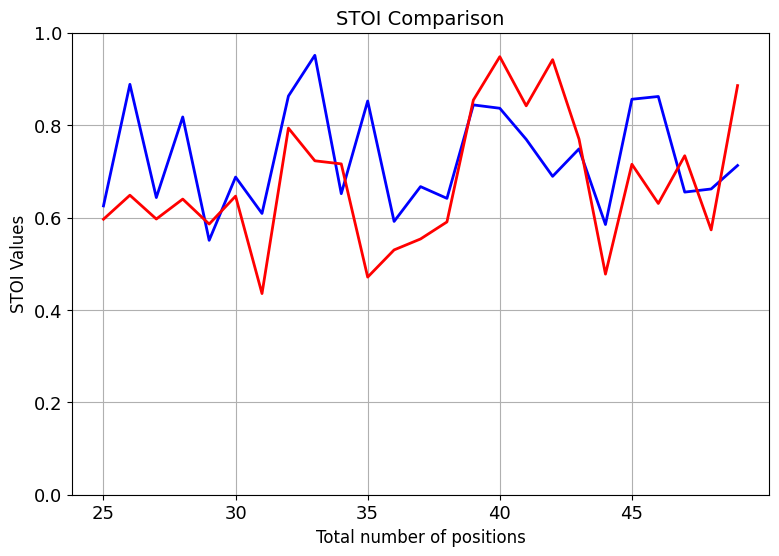

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Create the plot
plt.figure(figsize=(9, 6))
# Customize the plot
plt.xlabel('Total number of positions', fontsize=12)
plt.ylabel('STOI Values', fontsize=12)
plt.title('STOI Comparison', fontsize=14)
plt.xticks(range(25, 50, 5), rotation=0, fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(0, 1)
# plt.xlim(25,50)
plt.plot(x_indi, y_pred_stoi, label='y_pred STOI', color='blue', linewidth=2)
plt.plot(x_indi, y_test_stoi, label='y_test STOI', color='red', linewidth=2)
plt.grid(True)
# plt.legend(fontsize=10)
plt.figure(figsize=(12, 6))

In [ ]:
data = pd.read_csv('/content/Final60_40.csv')
sp_coordinates = data.iloc[25:50, 3:6].values #1:201
y_tst_coordinates = data.iloc[25:50, 6:9].values
y_prd_coordinates = data.iloc[25:50, 9:12].values

In [ ]:
# Calculate distances between speaker and y_pred/y_test
distances_y_pred = np.linalg.norm(sp_coordinates - y_prd_coordinates, axis=1)
distances_y_test = np.linalg.norm(sp_coordinates - y_tst_coordinates, axis=1)

In [ ]:
distances_y_test.shape

(25,)

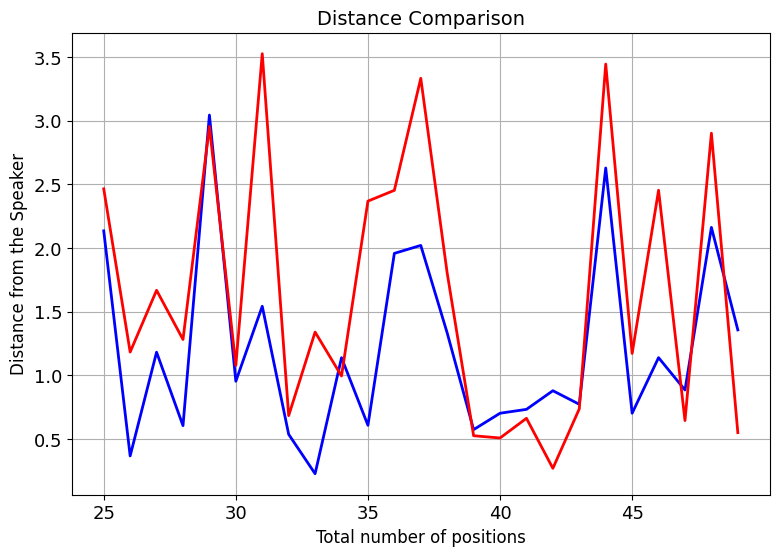

In [ ]:
# Create the plot
plt.figure(figsize=(9, 6))
# Customize the plot
plt.xlabel('Total number of positions', fontsize=12)
plt.ylabel('Distance from the Speaker', fontsize=12)
plt.title('Distance Comparison', fontsize=14)
plt.xticks(range(25, 50, 5), rotation=0, fontsize=13)
plt.yticks(fontsize=13)
# plt.ylim(0, 1)
# plt.xlim(25,50)
plt.plot(x_indi, distances_y_pred, label='Distance to y_pred', color='blue', linewidth=2)
plt.plot(x_indi, distances_y_test, label='Distance to y_test', color='red', linewidth=2)
plt.grid(True)